In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def create_diagram(title, 
                   nodes, 
                   edges, 
                   node_labels=None, 
                   node_types=None, 
                   edge_labels=None):
    graph = nx.DiGraph()
    graph.add_nodes_from(nodes)
    graph.add_edges_from(edges)    
    if node_labels is None:
        node_labels = {node: node for node in nodes}
    if node_types is None:
        node_types = {node: 'agent' for node in nodes}
    if edge_labels is None:
        edge_labels = {}


    # Figure
    plt.figure(figsize=(12, 8))
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    
    # Dynamic positioning based on graph layout algorithm
    # Try different layout algorithms based on graph structure
    if len(nodes) <= 5:
        # For smaller graphs, use a hierarchical layout
        pos = nx.spring_layout(graph, seed=42, k=1.5)
    else:
        # For larger graphs, use force-directed layout
        pos = nx.kamada_kawai_layout(graph)
    
    # Optional: adjust positions to improve flow direction (left to right)
    # Sort nodes by their x positions
    x_values = [pos[node][0] for node in nodes]
    min_x, max_x = min(x_values), max(x_values)
    
    # Normalize and spread the x positions for better visualization
    for node in nodes:
        x, y = pos[node]
        normalized_x = (x - min_x) / (max_x - min_x + 1e-10)  # avoid division by zero
        pos[node] = (normalized_x * 4, y * 2)  # Scale for better spacing
    
    node_colors = []
    node_shapes = []
    node_sizes = []
    
    for node in nodes:
        node_type = node_types.get(node, 'agent')
        
        if node_type == 'agent':
            node_colors.append("#6495ED")
            node_shapes.append('o')
            node_sizes.append(2800)
        elif node_type == 'tool':
            node_colors.append("#FFD700")
            node_shapes.append('s')
            node_sizes.append(2600)
        elif node_type == 'user':
            node_colors.append("#FF6347")
            node_shapes.append('d')
            node_sizes.append(2400)
        elif node_type == 'data':
            node_colors.append("#90EE90")
            node_shapes.append('h')
            node_sizes.append(2500)
        else:
            node_colors.append("#C0C0C0")
            node_shapes.append('p')
            node_sizes.append(2300)

    for i, node in enumerate(nodes):
        nx.draw_networkx_nodes(graph, pos, 
                             nodelist=[node],
                             node_color=[node_colors[i]], 
                             node_shape=node_shapes[i],
                             node_size=node_sizes[i],
                             edgecolors='black', 
                             linewidths=1.5, 
                             alpha=0.9)
    
    nx.draw_networkx_edges(graph, pos, 
                         edge_color="black", 
                         arrowsize=25,
                         width=2.0, 
                         alpha=0.9, 
                         arrowstyle='-|>', 
                         connectionstyle="arc3,rad=0.1")

    for node, (x, y) in pos.items():
        plt.text(x, y, node_labels[node], 
                fontsize=11, 
                ha='center', 
                va='center',
                fontweight='bold',
                bbox=dict(facecolor='white', 
                         alpha=0.8, 
                         edgecolor='lightgray', 
                         boxstyle='round,pad=0.5'))
                         
    if edge_labels:
        for edge, label in edge_labels.items():
            x1, y1 = pos[edge[0]]
            x2, y2 = pos[edge[1]]
            x = (x1 + x2) / 2
            y = (y1 + y2) / 2 + 0.15
            plt.text(x, y, label, 
                    fontsize=12, 
                    ha='center',
                    va='center',
                    fontweight='bold',
                    color='darkblue',
                    bbox=dict(facecolor='white', 
                             alpha=0.9,
                             edgecolor='blue',
                             boxstyle='round,pad=0.3'))

    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor="#6495ED", markersize=15, label='Agent'),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="#FFD700", markersize=15, label='Tool/Resource'),
        plt.Line2D([0], [0], marker='d', color='w', markerfacecolor="#FF6347", markersize=15, label='User Interface'),
        #plt.Line2D([0], [0], marker='h', color='w', markerfacecolor="#90EE90", markersize=15, label='Data Component')
    ]
    plt.legend(handles=legend_elements, loc='upper right', fontsize=12)

    plt.axis("off")
    plt.tight_layout()
    plt.savefig(f"{title}.png", dpi=300, bbox_inches='tight')
    plt.show()

Matplotlib is building the font cache; this may take a moment.


In [5]:
def demo_uluru_cultural_center():
    nodes = [
        "Visitor Input",
        "Language Identification", 
        "Arrernte Language Specialist",
        "Pitjantjatjara Language Specialist",
        "Knowledge Base Lookup"
    ]

    edges = [
        ("Visitor Input", "Language Identification"),
        ("Language Identification", "Arrernte Language Specialist"),
        ("Language Identification", "Pitjantjatjara Language Specialist"),
        ("Arrernte Language Specialist", "Knowledge Base Lookup"),
        ("Pitjantjatjara Language Specialist", "Knowledge Base Lookup"),
        ("Knowledge Base Lookup", "Arrernte Language Specialist"),
        ("Knowledge Base Lookup", "Pitjantjatjara Language Specialist"),
        ("Arrernte Language Specialist", "Language Identification"),
        ("Pitjantjatjara Language Specialist", "Language Identification"),
        ("Language Identification", "Visitor Input")
    ]

    node_types = {
        "Visitor Input": "user",
        "Language Identification": "agent", 
        "Arrernte Language Specialist": "agent",
        "Pitjantjatjara Language Specialist": "agent",
        "Knowledge Base Lookup": "tool"
    }
    
    create_diagram(
    'Demo',
    nodes,
    edges,
    None,
    node_types
    )

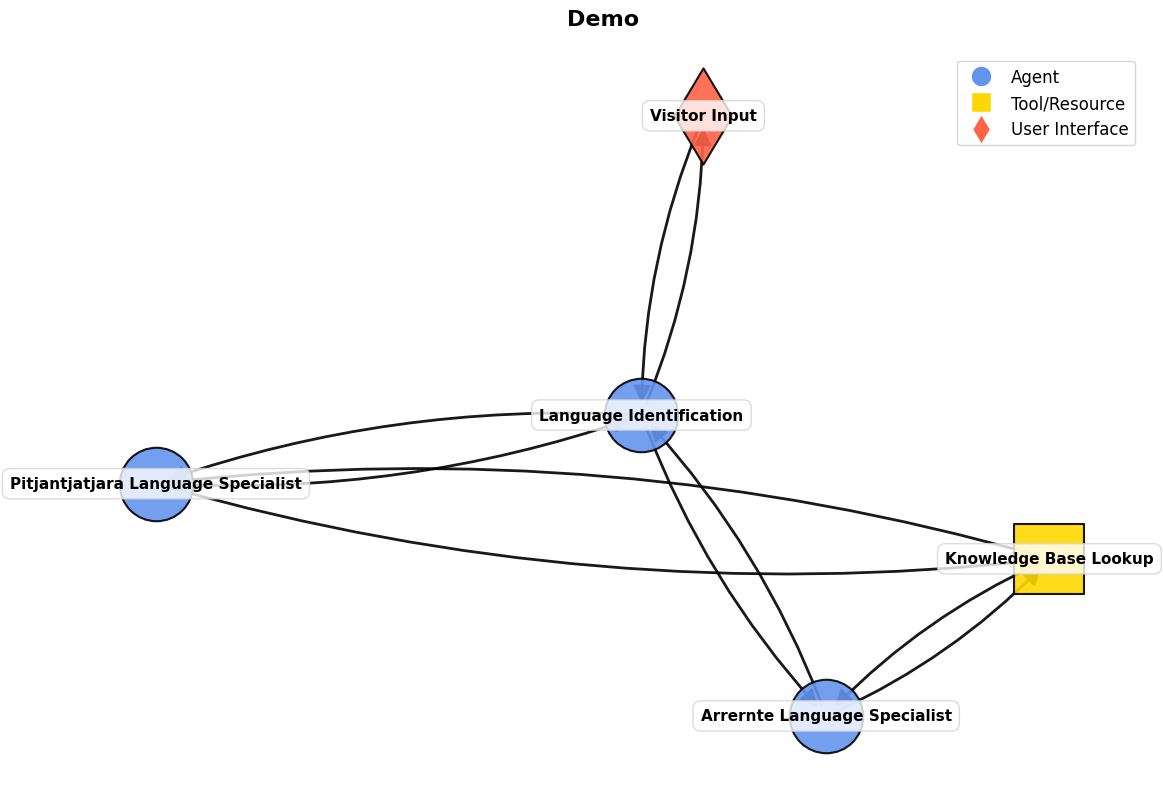

In [6]:
demo_uluru_cultural_center()